In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import dust
import math
import random
import numpy as np

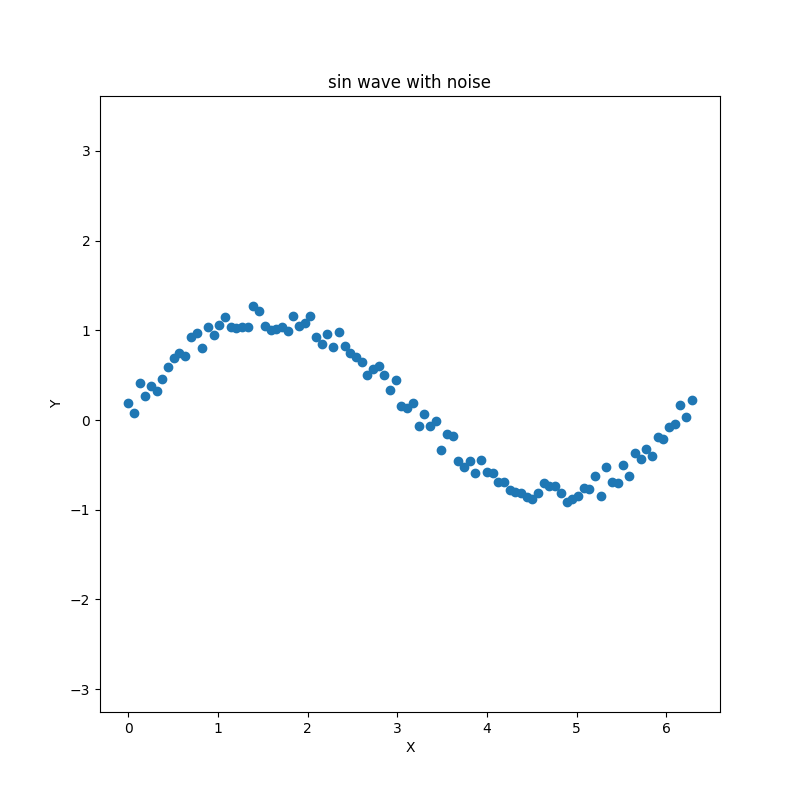

In [ ]:
def generate_sin_data(n_points=100, noise=0.3):
    # Half the points for each class
    x = np.linspace(0, np.pi * 2, n_points)
    y = np.sin(x) + noise * np.random.rand(len(x))

    return x, y

# Generate data
X, y = generate_sin_data()

# Plot the data
plt.figure(figsize=(8, 8))
plt.scatter(X, y)
plt.title("sin wave with noise")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [3]:
x1 = [float(it) for it in X]
x2 = [float(it) for it in y]

x_train = list(zip(x1, x2))
y_train = [float(it) for it in labels]

In [4]:
mlp = dust.MLP(2, 1, [5, 5, 5, 5])
optimizer = dust.BaseOptimizer(mlp.params, lr=0.0001)
iters = 200
for i in range(iters):
    tot_loss = 0
    correct = 0
    tot = 0 
    for j in range(len(x_train)):
        x_val = x_train[j]
        y_true = y_train[j]
        y_pred = mlp(x_val)[0]
        y_pred = y_pred / 2 + 0.5
        tot += 1
        if abs(y_pred.val - y_true) < 0.5:
            correct += 1
        loss = dust.cross_entropy(y_true, y_pred)
        loss.backward()
        tot_loss += loss.val

    print("Epoch: {}   Acc: {}".format(i, correct / tot))
    optimizer.step()
    optimizer.zero_grad()

Epoch: 0   Acc: 0.59  Y_pred: 0.8340346913782527,  Y_true: 1.0
Epoch: 1   Acc: 0.875  Y_pred: 0.8799848126906931,  Y_true: 1.0
Epoch: 2   Acc: 0.8575  Y_pred: 0.9011860918857092,  Y_true: 1.0
Epoch: 3   Acc: 0.852  Y_pred: 0.9137464930750352,  Y_true: 1.0
Epoch: 4   Acc: 0.8525  Y_pred: 0.9224356208674955,  Y_true: 1.0
Epoch: 5   Acc: 0.8555  Y_pred: 0.9290894069254846,  Y_true: 1.0
Epoch: 6   Acc: 0.858  Y_pred: 0.9345459184768659,  Y_true: 1.0
Epoch: 7   Acc: 0.8625  Y_pred: 0.939229722502106,  Y_true: 1.0
Epoch: 8   Acc: 0.8665  Y_pred: 0.9433706467136609,  Y_true: 1.0
Epoch: 9   Acc: 0.8705  Y_pred: 0.9470990392483871,  Y_true: 1.0
Epoch: 10   Acc: 0.873  Y_pred: 0.9504919161692448,  Y_true: 1.0
Epoch: 11   Acc: 0.877  Y_pred: 0.9535970222391418,  Y_true: 1.0
Epoch: 12   Acc: 0.8825  Y_pred: 0.9564459838513901,  Y_true: 1.0
Epoch: 13   Acc: 0.886  Y_pred: 0.9590616821612974,  Y_true: 1.0
Epoch: 14   Acc: 0.888  Y_pred: 0.961462401982869,  Y_true: 1.0
Epoch: 15   Acc: 0.8895  Y_pred

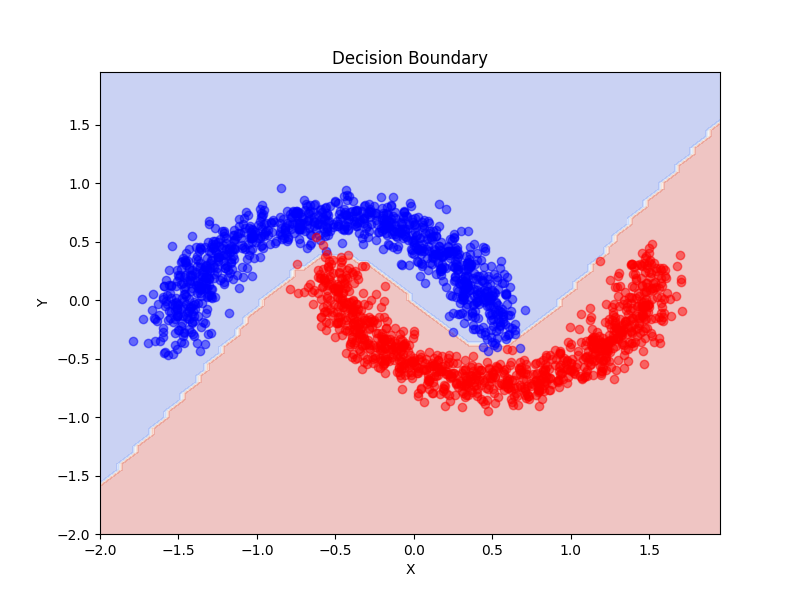

In [6]:
from itertools import product

# Define the range of x and y values
x_values = np.arange(-2, 2, 0.05)  # Example: x from 0 to 4
y_values = np.arange(-2, 2, 0.05)  # Example: x from 0 to 4
x_values = [float(it) for it in x_values]
y_values = [float(it) for it in y_values]

xx, yy = np.meshgrid(x_values, y_values)


# Create a list of (x, y) tuples
coordinates = list(product(x_values, y_values))
out = []
for point in coordinates:
    pred = mlp(point)[0].val
    pred = pred / 2 + 0.5
    out_curr = 0 if pred < 0.5 else 1
    out.append(out_curr)

out = np.array(out).reshape(xx.shape).T

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, out, alpha=0.3, cmap='coolwarm')
plt.scatter(X[labels == 0], y[labels == 0], color="blue", label="Class 0", alpha=0.5)
plt.scatter(X[labels == 1], y[labels == 1], color="red", label="Class 1", alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Boundary")
plt.show()